# <div align="center">Chapter 7: Data Formatting and Summarizing with Pandas</div>

**<div align="center"> Author: Dr. Suborna Ahmed</div>**

![panda1.png](Week10_img/panda1.png)

![pandas-2.png](Week10_img/pandas.png)

More references: https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas

## <span style="color:blue"> Learning Objectives:</span>  

* **Pandas:** 
    * Pandas Series
        * Series
        * DataFrame
        * Create subests and convert as a dataframe
        * Accessing index
        
    * Handling data
        * Import dataset
        * Summarize data
        * Import popular Iris data
        * Extract basic information in a data
        * Selecting data
        * Data Conditioning
        * Plot data and create:
            * Density plot
            * Histogram
            * Scatter plot
            * Boxplot          

## 1. Pandas

Pandas is a Python package. It provides fast, flexible, and expressive data structures. It is designed to make working with “relational” or “labeled” data both easy and intuitive and aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.


### 1.1. Pandas Series

#### Basic Data types

#### 1.1.1 Series

* Can be understood as a **1 dimensional labelled / indexed array**. You can access individual elements of this series through these labels.

* Capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the i**ndex**.

* If data is an nd-array, index must be the same length as data. If you create a DataFrame from an nd-array and don't provide an index, pandas will automatically create one for you. This index will consist of integers from 0 to N-1, where N is the number of rows in the Series.

* Series act like an 1D array, but any operation that slices the series, also slices the index!
* A Series is like a fixed-size dict in that you can get and set values by index label

* When doing data analysis, as with raw NumPy arrays looping through Series value-by-value is usually not necessary. Series can be also be passed into most NumPy methods expecting an nd-array.

Syntax structure: <code>s = pd.Series(data, index=index)</code>


Example for creating a Series:<br>
Import the pandas module first and create a Series for a list of numbers in range 10.<br>
In this case, we did not specify an index, so pandas automatically assigned one with values ranging from 0 to N-1, where N is the length of the data.

In [1]:
import pandas as pd

data = list(range(10))
pd.Series(data)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

Now we specify a custom index when creating the Series.

In [2]:
data = list(range(5))
index=["row1", "row2", "row3", "row4", "row5"]
pd.Series(data, index)

row1    0
row2    1
row3    2
row4    3
row5    4
dtype: int64

We can use the index/label to access specific data values in the Series.<br>
Using `.loc[index]`.

In [3]:
data = list(range(5))
index=["row1", "row2", "row3", "row4", "row5"]
s = pd.Series(data, index)

Access a single row by label:

In [4]:
s.loc["row5"]# access the value in row5

4

Access multiple rows by labels:

In [5]:
s.loc[["row1", "row5"]]# access the value in row1 and row5

row1    0
row5    4
dtype: int64

Access rows with a boolean array:

In [6]:
s.loc[s>2]

row4    3
row5    4
dtype: int64

#### 1.1.2. DataFrame
* 2-dimensional labeled data structure with columns of potentially different types. 
* You can think of it like a spreadsheet, or a dict of Series objects. 
* It is generally the most commonly used pandas object. 
* Like Series, DataFrame accepts many different kinds of input:
    * Dict of 1D nd-arrays, lists, dicts, or Series
    * 2-D numpy.ndarray
    * Structured or record nd-array
    * A Series
    * Another DataFrame
* Along with the data you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame.

* The row and column labels can be accessed respectively by accessing the index and columns attributes.

* DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

The example below show how to create a DataFrame and the way to use `.loc[index]` to access specific data by rows and columns.

In [7]:
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Age': [28, 24, 35, 32],
        'City': ['New York', 'Paris', 'Berlin', 'London']}
df = pd.DataFrame(data)
df

,Name,Age,City
0,John,28,New York
1,Anna,24,Paris
2,Peter,35,Berlin
3,Linda,32,London


Accessing a single row:

In [8]:
df.loc[1] # access the row with index=1

Name     Anna
Age        24
City    Paris
Name: 1, dtype: object

Accessing multiple rows:

In [9]:
 df.loc[1:3] # access the rows from index=1 to index=3

,Name,Age,City
1,Anna,24,Paris
2,Peter,35,Berlin
3,Linda,32,London


Accessing rows and columns:

In [10]:
df.loc[[1,2], 'Name'] # access the 'Name' for people from index = 1 and 2

1     Anna
2    Peter
Name: Name, dtype: object

Accessing a slice of rows and specific columns:

In [11]:
df.loc[1:3, ['Name', 'City']] # access the 'Name' and 'City' for the people in rows with indices 1 to 3

,Name,City
1,Anna,Paris
2,Peter,Berlin
3,Linda,London


Accessing rows based on a condition:

In [12]:
df.loc[df['Age'] > 30] # get the rows that people are older than 30

,Name,Age,City
2,Peter,35,Berlin
3,Linda,32,London


#### 1.1.3. Install Libraries

In [13]:
#import gdal
import rasterio
import numpy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from rasterio.plot import show
import os

#### 1.1.4. Create a DataFrame

In [14]:
# created a dataset
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
         'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
print(d)

{'one': a    1.0
b    2.0
c    3.0
dtype: float64, 'two': a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64}


In [15]:
# converted to a frame
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


Since there's no data in row d for the first column, the "NaN" here represents no data.

In [16]:
# accessing index
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [17]:
# accessing column names
df.columns

Index(['one', 'two'], dtype='object')

In [18]:
# access subset of df
print("df[:1]=\n", df[:1])# printed first row
print("df[2:]=\n", df[2:])# printed last two rows (starting from index 2 through the end of the DataFrame)
print("df[1:]=\n", df[1:])# starting from index 1(row2) through the end of DataFrame

df[:1]=
    one  two
a  1.0  1.0
df[2:]=
    one  two
c  3.0  3.0
d  NaN  4.0
df[1:]=
    one  two
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


More examples for creating Series and DataFrame:

In [19]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print("s=\n",s)

dates = pd.date_range('20130101', periods=6)
print('dates=\n',dates)
#'20130101' is the start date for the range. This string is interpreted as the date January 1, 2013.
#periods=6 specifies the number of periods to generate from the start date. Here, it is set to generate 6 dates.

s=
 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
dates=
 DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [20]:
d1 = pd.DataFrame([[11, 52, 15], [30, 44, 55], [15, 23, 0]], columns=list('XYZ'), index=['a', 'b', 'c'])
d1

,X,Y,Z
a,11,52,15
b,30,44,55
c,15,23,0


In [21]:
d2 = pd.DataFrame([[111, 521, 15], [30, 414, 55], [115, 23, 1]], columns=list('XYZ'), index=['d', 'e', 'f'])
d2

,X,Y,Z
d,111,521,15
e,30,414,55
f,115,23,1


In [22]:
# Append two dataframe
d3= d1.append(d2)
d3

,X,Y,Z
a,11,52,15
b,30,44,55
c,15,23,0
d,111,521,15
e,30,414,55
f,115,23,1


``````{admonition} Activity 1

* Create a DataFrame from an array of 10 random ints 
* Display this dataframe
* Create a DataFrame from a list of numbers between 1-10, and indexed by a list of letter a-j.
* Add to the previous DataFrame a new columns of numbers between 11-20
* Display this DataFrames
``````

In [23]:
# Write your solution here


See [solution for activity 1](section-label-10.1) at the end.

### 1.2 Handling Data

`pd.read_csv()`: is the most commonly used pandas function used to read comma-separated values (CSV) files into a pandas DataFrame. You simply pass the filename (if the file is in the same directory as this JupyterNotebook) or the file path as a string to this function to import your data. 

In [24]:
lfdb = pd.read_csv("Week10_data/Example_Data.csv")
lfdb

,ID,Species,DBH,Height
0,1,F,7.7,10.00
1,2,F,9.7,8.79
2,3,C,9.9,8.69
3,4,H,10.2,13.93
4,5,H,10.8,10.18
5,6,C,12.4,11.52
6,7,C,12.8,13.20
7,8,C,13.0,10.88
8,9,F,13.0,13.20
9,10,F,13.1,11.31


#### 1.2.1. Data Summary
* <code>data.describe()</code>: includes summary of of numerical variables only.
* <code>data.describe(include='all')</code>: includes character variables as well.
* <code>data.head()</code>: gives the first five rows.
* <code>data.tail()</code>: dives the last five rows.

`.head(n)` and `.tail(n)` methods are used to return the first and last n rows of your DataFrame or Series. (n is optional)

In [25]:
lfdb.head()

,ID,Species,DBH,Height
0,1,F,7.7,10.00
1,2,F,9.7,8.79
2,3,C,9.9,8.69
3,4,H,10.2,13.93
4,5,H,10.8,10.18


In [26]:
lfdb.tail(3)

,ID,Species,DBH,Height
47,48,C,20.9,16.25
48,49,H,22.3,16.84
49,50,H,22.7,21.46


In [27]:
des_data= lfdb.describe()
print(des_data)

             ID        DBH     Height
count  50.00000  50.000000  50.000000
mean   25.50000  15.794000  13.943200
std    14.57738   3.227017   2.907177
min     1.00000   7.700000   8.470000
25%    13.25000  13.875000  11.777500
50%    25.50000  15.700000  14.240000
75%    37.75000  18.100000  16.052500
max    50.00000  22.700000  21.460000


In [28]:
des_data_all= lfdb.describe(include='all')
print(des_data_all) 

              ID Species        DBH     Height
count   50.00000      50  50.000000  50.000000
unique       NaN       3        NaN        NaN
top          NaN       C        NaN        NaN
freq         NaN      22        NaN        NaN
mean    25.50000     NaN  15.794000  13.943200
std     14.57738     NaN   3.227017   2.907177
min      1.00000     NaN   7.700000   8.470000
25%     13.25000     NaN  13.875000  11.777500
50%     25.50000     NaN  15.700000  14.240000
75%     37.75000     NaN  18.100000  16.052500
max     50.00000     NaN  22.700000  21.460000


#### 1.2.3 Iris Dataset

* Common example used in data science and machine learning
* It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. 
* Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".
* The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
* Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

Reference: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

#### 1.2.4. Install Libraries and Iris Data

In [29]:
# load here or from Command Prompt
#!pip install -U scikit-learn
import sklearn

In [30]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
sklearn.datasets.load_iris()
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data

In [31]:
data[1:10]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [32]:
column_names = iris.feature_names
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Transform the data to be a DataFrame and get some data summaries:

In [33]:
df = pd.DataFrame(iris.data, columns=column_names)
print(df.describe(include='all'))

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [34]:
print(df.head())
print(df.tail())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


The values 0, 1, and 2 in iris.target correspond to the three different species of the Iris flower.

In [35]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

`````{admonition} df.replace() function:
:class: tip
    
The df.replace() function in pandas is used to replace values in a DataFrame (df). It's a very flexible method that can be used in a variety of ways to replace values in a DataFrame.

- to_replace: The value(s) that you want to replace. 

- value: The value(s) that you want to replace to_replace with. 

- inplace: If True, the replacement is done in-place, and the DataFrame is modified directly. If False, the method returns a new DataFrame with the changes.

- method: This parameter specifies a method for filling in missing values. The default is 'pad', which means that if a value is not found in the DataFrame, the last valid observation will be used to fill the missing value. Same as forward fill: 'ffill'. Use the previous valid observation to fill missing values.
Backward fill: 'backfill' or 'bfill': use the next valid observation to fill missing values.
``````

In [36]:
df['Names']=iris.target
df['Names'].replace(to_replace=0, value='setosa',  inplace=True)
df['Names'].replace(to_replace=1, value='versicolor',  inplace=True)
df['Names'].replace(to_replace=2, value='virginica',  inplace=True)

In [37]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    Names  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [38]:
print(df.tail())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         Names  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  


#### 1.2.5 Basic Information
* <code>data.info()</code>: gives a concise summary of a DataFrame. This includes the index dtype and column dtypes, non-null values and memory usage.

* <code>data.shape</code>: number of rows and columns
* <code>data.index</code>:  provides information about the DataFrame index. This includes its type (for example RangeIndex for a default integer index) and its range.
* <code>data.columns</code>: returns the column labels of the DataFrame.
* <code>data.count()</code>: returns the number of non-NA/null values in each DataFrame column.

* <code>data.sum()</code>: sum of values
* <code>data.cumsum()</code>: cumulative sum of values
* <code>data.mean()</code>: mean of values
* <code>data.median()</code>: median of values

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Names              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
print(
"shape=", df.shape, '\n',
"index=", df.index,'\n',
"columns=", df.columns,'\n',
"count=", df.count(), '\n'
)

shape= (150, 5) 
 index= RangeIndex(start=0, stop=150, step=1) 
 columns= Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Names'],
      dtype='object') 
 count= sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
Names                150
dtype: int64 



In [41]:
df.sum() #Sum of values by columns

sepal length (cm)                                                876.5
sepal width (cm)                                                 458.6
petal length (cm)                                                563.7
petal width (cm)                                                 179.9
Names                setosasetosasetosasetosasetosasetosasetosaseto...
dtype: object

In [42]:
df.cumsum() #Cumulative sum of values, by columns

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Names
0,5.1,3.5,1.4,0.2,setosa
1,10.0,6.5,2.8,0.4,setosasetosa
2,14.7,9.7,4.1,0.6,setosasetosasetosa
3,19.3,12.8,5.6,0.8,setosasetosasetosasetosa
4,24.3,16.4,7.0,1.0,setosasetosasetosasetosasetosa
...,...,...,...,...,...
145,851.6,446.7,543.0,171.9,setosasetosasetosasetosasetosasetosasetosaseto...
146,857.9,449.2,548.0,173.8,setosasetosasetosasetosasetosasetosasetosaseto...
147,864.4,452.2,553.2,175.8,setosasetosasetosasetosasetosasetosasetosaseto...
148,870.6,455.6,558.6,178.1,setosasetosasetosasetosasetosasetosasetosaseto...


In [43]:
df.min() #Minimum values in each column

sepal length (cm)       4.3
sepal width (cm)        2.0
petal length (cm)       1.0
petal width (cm)        0.1
Names                setosa
dtype: object

In [44]:
df.max() #Maximum values in each column

sepal length (cm)          7.9
sepal width (cm)           4.4
petal length (cm)          6.9
petal width (cm)           2.5
Names                virginica
dtype: object

In [45]:
df.mean() #Mean of values in each column

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [46]:
df.median() #Median of values in each column

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

The `df.sum(), df.cumsum(), df.min(), df.max(), df.mean(), df.median()` functions can be used to calculate values for the requested axis. (recall the axis in nd-array from week 9 material)<br>
**axis=0 refers to the first index coordinate, axis=1 the second.**<br>
Thus in the DataFrame, `axis=0 refers to the columns(default), axis=1 refers to the rows`. 

#### 1.2.6. Selecting Data

* <code>[]</code>: slicing returns rows and columns and second unwritten number is assumed to be `:`, always.
* Get a subset of the DataFrame: eg: <code>df[10:]</code> # returns all columns and all rows from 10 and above.
* Whole column: <code>df[‘sepal_length (cm)’]</code>, and ‘sepal_length (cm)’ is the column name.
* <code>data.loc[]</code>: Slice by indexing, the first set of numbers is rows and the second set is columns.
* <code>data.iloc[]</code>: Used for integer indexing


Slice the DataFrame df using the row indices: [1:10] indicates from index 1 inclusive up to index 10 exclusive.

In [47]:
df[1:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Names
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Slice the DataFrame df using the column name.

In [48]:
df["sepal length (cm)"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

Select the data at the row with index label 1(the second row) and at the column with label 'sepal length (cm)'.

In [49]:
df.loc[1, 'sepal length (cm)'] # Getting one value

4.9

0:6: selects rows from position 0 (inclusive) up to position 6 (exclusive). Therefore, it will select rows 0 through 5 (which are the first six rows of the DataFrame).
<br>
1:3: selects columns from position 1 (inclusive) up to position 3 (exclusive). Therefore, it will select columns 1 and 2 (the second and third columns of the DataFrame).

In [50]:
df.iloc[0:6,1:3] #Getting lots of values

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
5,3.9,1.7


``````{admonition} Activity 2

Select all the rows in the iris DataFrame where:
    1. sepal length (cm) is more than 6.5; and
    2. sepal width (cm) is more than 3.1; and
    3. petal length (cm) is more than 5.7; and
    4. petal width (cm) is less than 2.0

**HINT**: you can extract data to a new DataFrame to store	your selections
``````

In [51]:
# Write your solution here


See [solution for activity 2](section-label-10.2) at the end.

#### 1.2.7. Data Conditioning
* Use <code>&</code> for adding two conditions to satisify. Same as `AND` in logical operation.
* Use <code>|</code> for satisfying either of the conditions. Same as `OR` in logical operation.

In [52]:
Both=df[(df['petal length (cm)']>5.7) & (df['petal width (cm)']<2.0) ]
Both

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Names
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
130,7.4,2.8,6.1,1.9,virginica


In [53]:
Either=df[(df['petal length (cm)']>5.7) | (df['petal width (cm)']<2.0) ]
Either

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
138,6.0,3.0,4.8,1.8,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica


#### 1.2.8. Plotting

There are many different plot types provided by the `.plot` accessor in pandas, which is an easy way to plot DataFrame using matplotlib. 

`df.plot.area()` creates an area plot, which is just a line plot, but with the area under the line filled in. It can be a useful way to display cumulative totals.

<Axes: >

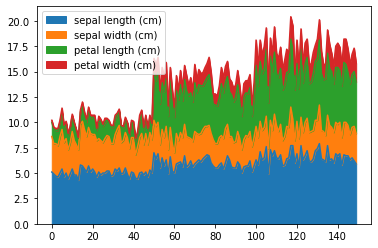

In [54]:
df.plot.area() 

`df.plot.barh()` creates a **horizontal bar plot**, which is useful for comparing quantities of different categories. Each row of data is represented as a horizontal bar.

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

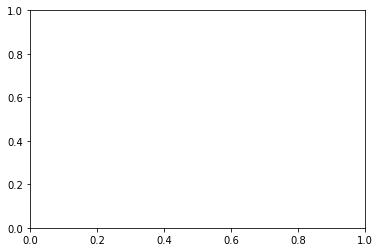

In [55]:
df.plot.barh()

`df.plot.density()` creates a density plot (also known as a Kernel Density Estimate plot or KDE), which is a smoothed, continuous version of a histogram estimated from the data.

<Axes: ylabel='Density'>

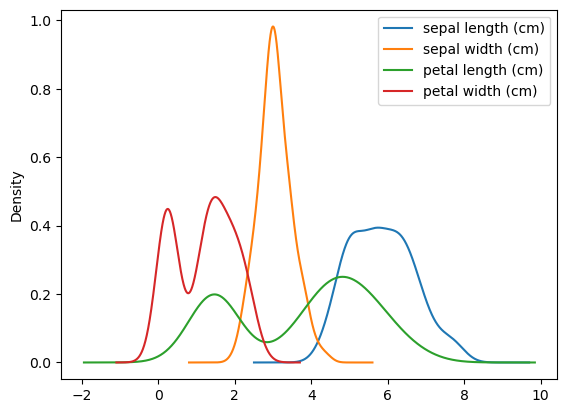

In [63]:
df.plot.density()

`df.plot.hist()` creates a histogram, which is an accurate graphical representation of the distribution of the dataset.

<Axes: ylabel='Frequency'>

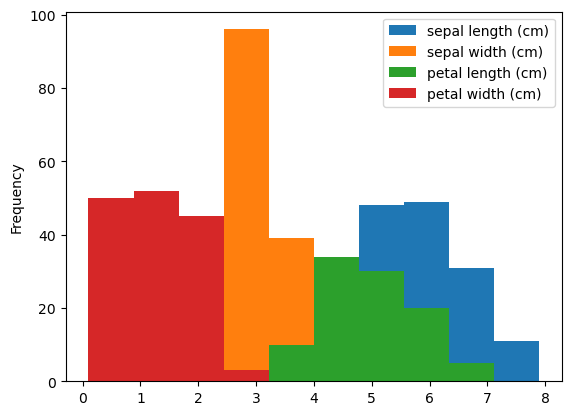

In [64]:
df.plot.hist()

`df.plot.line()` creates a line plot, which is typically used for plotting series of data points connected by line. It's useful for visualizing trends over time or other continuous indexed data.

<Axes: >

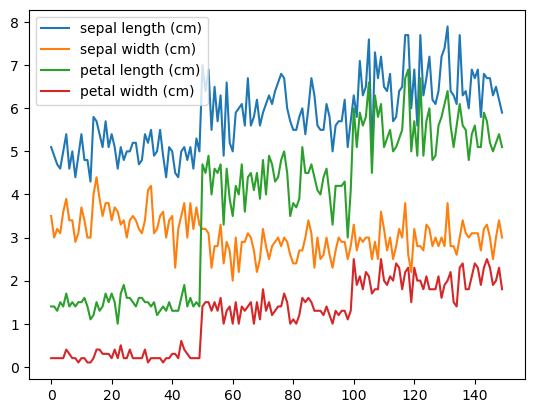

In [65]:
df.plot.line()

`df.plot.scatter()` creates a scatter plot with self defined x and y axes. Each point represents a row in the DataFrame. The color of the points also can be self defiend. (Refers to the Matplotlib chapter)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

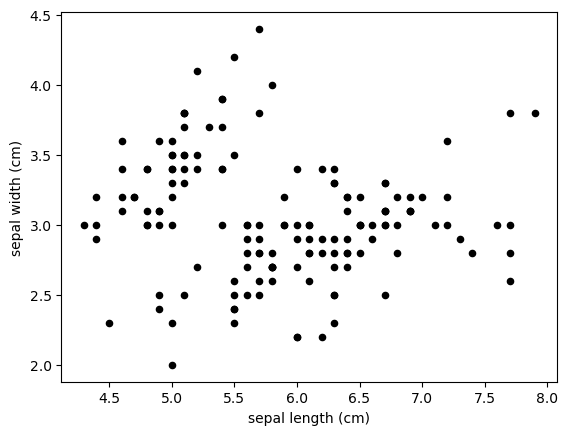

In [66]:
df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c="black") #reqs arguments – see documentation

`df.plot.bar()` creates a bar plot, similar to a horizontal bar plot, but with vertical bars here.

<Axes: >

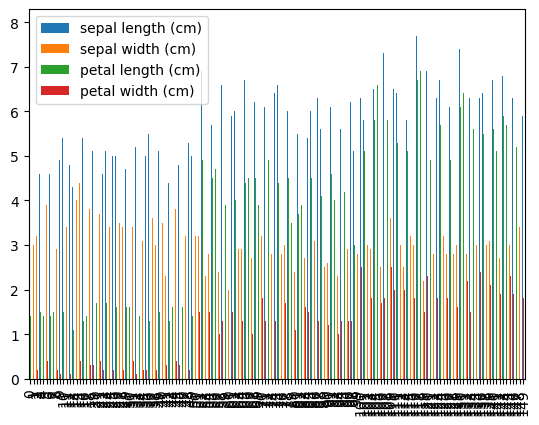

In [67]:
df.plot.bar() 

`df.plot.box()` creates a box plot, which is a way to show the distribution of values in a set of data. Box plots display the median, quartiles, and potential outliers.

<Axes: >

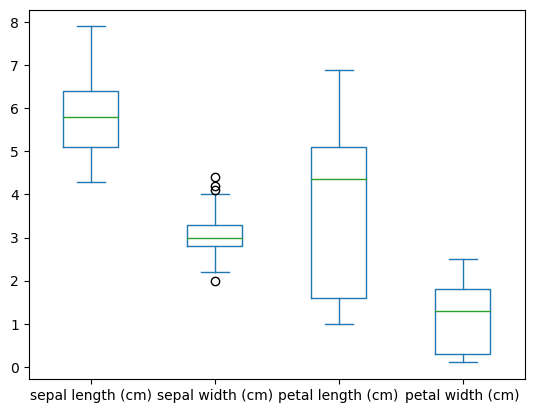

In [68]:
df.plot.box()

`df.plot.hexbin()` creates a hexagonal binning plot, which is useful for Bivariate Data, alternative to scatterplot. It groups points into hexagonal bins and colorizes the bins based on the number of points in each bin.

<Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>

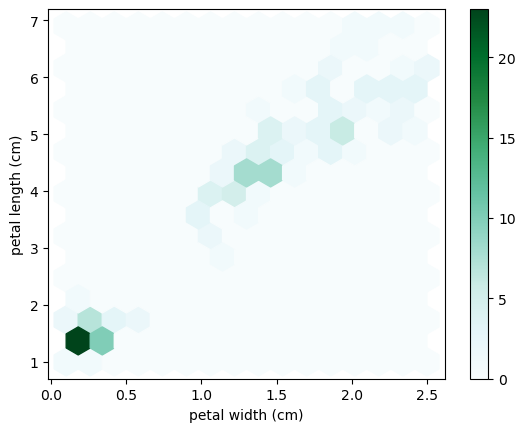

In [69]:
df.plot.hexbin('petal width (cm)', 'petal length (cm)', gridsize=15)

The `df.plot()` function in pandas is a convenient method to create a **basic line plot** of all columns in the DataFrame.

<Axes: >

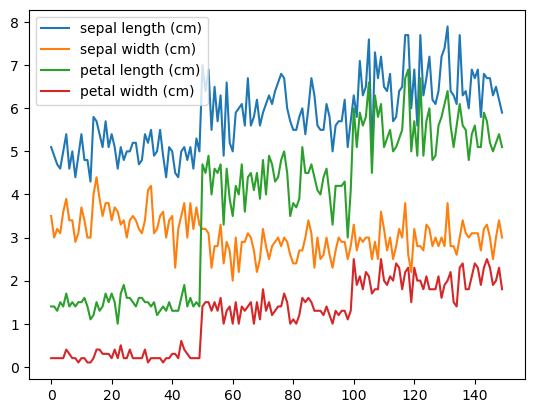

In [70]:
df.plot()

What df.hist() does:
- For each column (numerical data) in your DataFrame, it creates a separate histogram.
- By default, the function creates a histogram with 10 bins, which is generally a good starting point for visualizations.
- Each bin represents a range of values on the x-axis, and the number of data points that fall into this range are represented by the height of the corresponding bar on the y-axis.

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

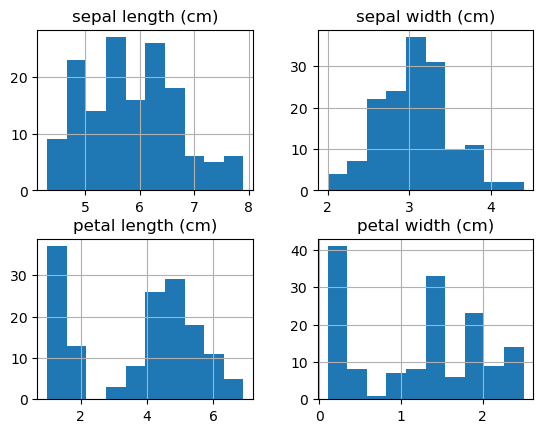

In [71]:
df.hist() # A histogram! 

**Rename a column**

The rename function in pandas is used to alter the labels of the index or columns of a DataFrame. It's a useful tool for changing the names of columns or the index labels to make them more descriptive or to follow a particular naming convention.

In [72]:
df.head() # show the original dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Rename the "sepal length (cm)" to "sepal_length":

In [73]:
# Rename a column
df.rename(columns={"sepal length (cm)": "sepal_length"})

,sepal_length,sepal width (cm),petal length (cm),petal width (cm),Names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


``````{admonition} Activity 3
    
**Plotting the Iris Dataset**
1. Create a boxplot of the Iris dataset.
    * Using DataFrame.boxplot()
    * Using pd.plotting.boxplot()
2. Create a histogram of the Iris dataset
    * Change the color to ‘#999900’
3. Create a hexbin of sepal length and petal length with a gridsize of 15

4. Create a scatter plot of sepal width and petal length. In the scatter plot give different colour for different species. 
``````

In [74]:
# Write your solution here


See [solution for activity 3](section-label-10.3) at the end.

## Example
We collected a dataset from Haida Gwaii form a planting site. 
1. Import the csv file.
2. Create a scatter plot of two species only to show the relatiosnship between prejoected height and age.


In [77]:
# import the csv file and have a look at the DataFrame
lfdb1 = pd.read_csv("Week10_data/haida_gwaii.csv")
lfdb1.head()

,OBJECTID,SPECIES_CD_1,PROJ_AGE_1,PROJ_HEIGHT_1,LIVE_VOL_PER_HA_SPP1_125
0,1,NaN,0,0.0,0.0
1,2,NaN,0,0.0,0.0
2,3,NaN,0,0.0,0.0
3,4,NaN,0,0.0,0.0
4,5,NaN,0,0.0,0.0


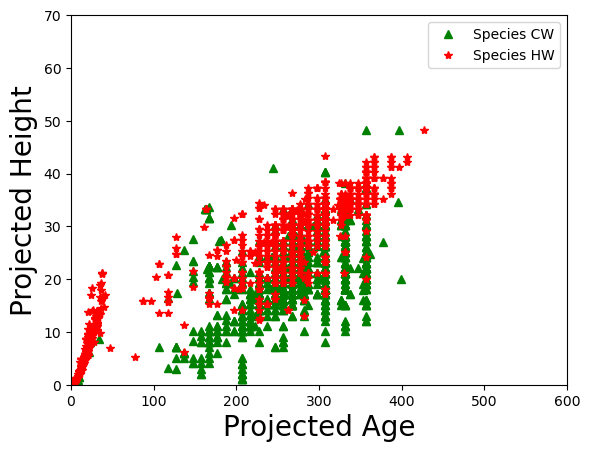

In [78]:
CW = lfdb1[(lfdb1.SPECIES_CD_1 == "CW")]
HW = lfdb1[(lfdb1.SPECIES_CD_1 == "HW")]

plt.plot(CW.PROJ_AGE_1,CW.PROJ_HEIGHT_1, marker='^', color='green', label='Species CW', linestyle=' ')
plt.legend()
plt.plot(HW.PROJ_AGE_1,HW.PROJ_HEIGHT_1, marker='*', color='red', label='Species HW', linestyle=' ')
plt.ylim(0, 70)
plt.xlim(0, 600)
plt.ylabel('Projected Height', fontsize=20)
plt.xlabel('Projected Age', fontsize=20)
plt.legend()

## Solutions

(section-label-10.1)=
### Activity 1

In [79]:
# Create a DataFrame from an array of 10 random ints and dispaly
dt1 = np.random.randint(0, 500, size =10)
df1 = pd.DataFrame(dt1)
df1

,0
0,213
1,15
2,384
3,353
4,84
5,499
6,128
7,4
8,106
9,253


In [80]:
# another way to do this problem
dt = {'Column1':pd.Series(dt1, index =['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])}
dfm=pd.DataFrame(dt)
dfm

,Column1
a,213
b,15
c,384
d,353
e,84
f,499
g,128
h,4
i,106
j,253


In [81]:
# Create a dataframe from a list of numbers between 1-10, and indexed by a list of letter a-j and display
dt2= range(1,11)
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df2=pd.DataFrame(dt2, index=letters)
df2

,0
a,1
b,2
c,3
d,4
e,5
f,6
g,7
h,8
i,9
j,10


In [82]:
# Add to the previous dataframe a new columns of numbers between 11-20 and display
dt3=range(11,21)
df2['New_Column']=dt3
df2

,0,New_Column
a,1,11
b,2,12
c,3,13
d,4,14
e,5,15
f,6,16
g,7,17
h,8,18
i,9,19
j,10,20


(section-label-10.2)=
### Activity 2

In [83]:
# 1. sepal length (cm) is more than 6.5
ok=df[df['sepal length (cm)']>6.5]
ok

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Names
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica


In [84]:
# 2. sepal width (cm) is more than 3.1
ok2=ok[ok['sepal width (cm)']>3.1]
ok2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Names
50,7.0,3.2,4.7,1.4,versicolor
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
120,6.9,3.2,5.7,2.3,virginica
124,6.7,3.3,5.7,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
131,7.9,3.8,6.4,2.0,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica


In [85]:
# 3. petal length (cm) is more than 5.7
ok3=ok2[ok2['petal length (cm)']>5.7]
ok3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Names
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
125,7.2,3.2,6.0,1.8,virginica
131,7.9,3.8,6.4,2.0,virginica
143,6.8,3.2,5.9,2.3,virginica


In [86]:
# 4. petal width (cm) is less than 2.0
ok4=ok3[ok3['petal width (cm)']<2.0]
ok4

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Names
125,7.2,3.2,6.0,1.8,virginica


(section-label-10.3)=
### Activity 3

<Axes: >

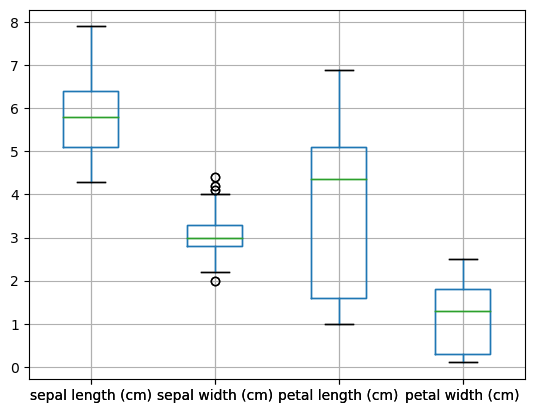

In [87]:
# 1
pd.plotting.boxplot(df)
df.boxplot()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

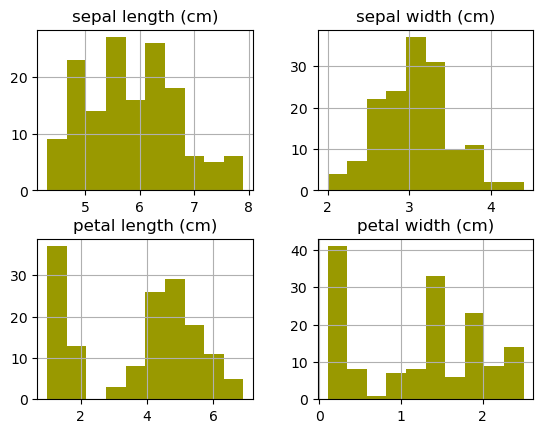

In [88]:
# 2
df.hist( color='#999900')

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

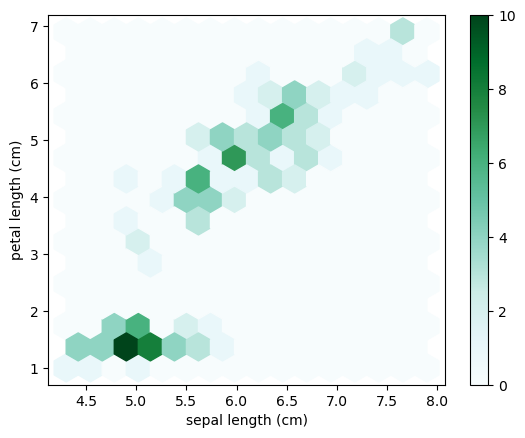

In [89]:
# 3
df.plot.hexbin('sepal length (cm)', 'petal length (cm)', gridsize=15)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: colors, Length: 150, dtype: object
0      green
1      green
2      green
3      green
4      green
       ...  
145     blue
146     blue
147     blue
148     blue
149     blue
Name: colors, Length: 150, dtype: object


<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

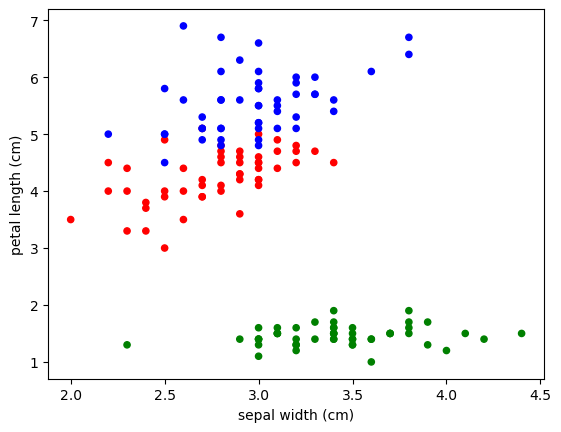

In [90]:
# 4
df['colors']=df['Names']
print(df['colors'])
df['colors'].replace(to_replace='setosa', value='green',  inplace=True)
df['colors'].replace(to_replace='virginica', value='blue',  inplace=True)
df['colors'].replace(to_replace='versicolor', value='red',  inplace=True)
print(df['colors'])
df.plot.scatter('sepal width (cm)', 'petal length (cm)', c=df['colors'])